# Importação das Bibliotecas que serão utilizadas no Modelo

In [8]:
!pip install --upgrade tensorflow-addons

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import gdown
import plotly.express as px
import plotly.graph_objects as go
from tensorflow.keras import backend as K

## Download dos arquivos contendo os datasets de consumo desde 2019 a 2024
  - Aqui retiramos a base de 2020, por conta da pandemia do Coronavírus. Foi uma escolha do grupo devido à possibilidade de discrepância nas leituras

In [11]:
arquivo_destino_base = "dataset_{}.csv"

ids = {
    "consumo_2024": "1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW",
    "consumo_2023": "1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp",
    "consumo_2022": "1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC",
    "consumo_2021": "1-2PsTLzG4dcY4wM0p7vFfabUuLv950gC",
    "consumo_2020": "1-1pOoa0eJlNJ94BMi7p4PTx5KUS96mhX",
    "consumo_2019": "1-2PsTLzG4dcY4wM0p7vFfabUuLv950gC",
    "CONSUMO_GERAL": "1-IOqfwmh_tTIDHeOer8J-HkGFtwuX67g",
}


dataframes = {}


for key, file_id in ids.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    arquivo_destino = arquivo_destino_base.format(key)

    gdown.download(url, arquivo_destino, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW
From (redirected): https://drive.google.com/uc?id=1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW&confirm=t&uuid=bcd7ad83-6548-4457-8aba-55358579f35e
To: /content/dataset_consumo_2024.csv
100%|██████████| 668M/668M [00:02<00:00, 228MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp
From (redirected): https://drive.google.com/uc?id=1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp&confirm=t&uuid=d3ee108f-b993-41f8-ba6e-014656e6918f
To: /content/dataset_consumo_2023.csv
100%|██████████| 1.09G/1.09G [00:05<00:00, 201MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC
From (redirected): https://drive.google.com/uc?id=1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC&confirm=t&uuid=8f9b044f-fc1c-46b1-9a22-5c130b974f1d
To: /content/dataset_consumo_2022.csv
100%|██████████| 1.07G/1.07G [00:03<00:00, 269MB/s]
Downloading...
From (original): h

In [12]:
arquivos_csv = [
    "./dataset_consumo_2024.csv",
    "./dataset_consumo_2023.csv",
    "./dataset_consumo_2022.csv",
    "./dataset_consumo_2021.csv",
    "./dataset_consumo_2019.csv",
]

ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)

<ipython-input-12-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-12-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-12-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-12-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis

In [13]:
consumo_geral = pd.read_csv('/content/dataset_CONSUMO_GERAL.csv')

## Download do dataset com o Target das Fraudes

In [14]:
file_id_fraudes = "1-MbIlChqQapcxFkoJgpbQIsN9FBLfbX1"
url_fraudes = f"https://drive.google.com/uc?id={file_id_fraudes}"

gdown.download(url_fraudes, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-MbIlChqQapcxFkoJgpbQIsN9FBLfbX1
To: /content/fraudes.csv
100%|██████████| 55.0M/55.0M [00:00<00:00, 219MB/s]


'fraudes.csv'

In [15]:
fraudes = pd.read_csv('/content/fraudes.csv')

### A tabela "ALL_COLUMNS_CONSUMO_GERAL" possui todas as tabelas de consumo e a partir disso decidimos considerar algumas colunas categóricas que podem ajudar a melhorar o desempenho do nosso modelo

In [16]:
ALL_COLUMNS_CONSUMO_GERAL

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2024-05-01,4.0,17.0,16.0,11.0,17188010.0,581756.0,0.0,...,63-RETIDA - FATURA ELETRONICA,-21.0,0.0,NaN,901.0,N,Normal,S,-20.460904,-54.634308
1,1,2.0,2024-06-01,4.0,87.0,60.0,38.0,17424465.0,188809.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.520205,-54.602621
2,2,2.0,2024-07-01,14.0,85.0,314.0,9.0,17857770.0,454315.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.517992,-54.605950
3,3,2.0,2024-03-01,8.0,5.0,112.0,25.0,17702922.0,311133.0,0.0,...,04-FIXADA AO PORTAO,0.0,0.0,NaN,900.0,N,Normal,S,-20.453648,-54.611187
4,4,2.0,2024-01-01,12.0,88.0,284.0,43.0,17719490.0,735648.0,1.0,...,02-CAIXA CORREIO,-9.0,0.0,NaN,901.0,N,Normal,S,-20.516981,-54.592872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210815,4210815,2.0,2019-11-01,12.0,8.0,271.0,4.0,17108333.0,1049413.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.469254,-54.597804
4210816,4210816,2.0,2019-11-01,9.0,92.0,330.0,47.0,17171758.0,886058.0,1.0,...,04-FIXADA AO PORTAO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.550235,-54.573375
4210817,4210817,2.0,2019-11-01,11.0,38.0,416.0,20.0,17779236.0,262062.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,104.0,N,Normal,N,-20.438123,-54.666558
4210818,4210818,2.0,2019-04-01,16.0,3.0,76.0,1.0,17338320.0,167787.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,900.0,N,Normal,S,-20.456004,-54.596311


### Remoção de colunas indesejadas até o momento

In [17]:
ALL_COLUMNS_CONSUMO_GERAL = ALL_COLUMNS_CONSUMO_GERAL.drop(columns=['Unnamed: 0', 'EMP_CODIGO', 'COD_GRUPO', 'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL', 'ECO_PUBLICA', 'ECO_OUTRAS','LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA', 'DIAS_LEITURA', 'COD_LEITURA_INF_1', 'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA', 'DSC_SIMULTANEA', 'COD_LEITURA_INT','EXCECAO'])

In [18]:
ALL_COLUMNS_CONSUMO_GERAL.columns

Index(['REFERENCIA', 'MATRICULA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'VOLUME_ESTIMADO',
       'VOLUME_ESTIMADO_ACUM', 'FATURADO_MEDIA', 'STA_TROCA',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

### Nessa seção queriamos validar a tabela de "VOLUME_ESTIMADO_ACUM" para ver se ela poderia agregar dentro do nosso modelo

In [19]:
ALL_COLUMNS_CONSUMO_GERAL[['VOLUME_ESTIMADO_ACUM']].nunique()

,0
VOLUME_ESTIMADO_ACUM,852


In [20]:
ALL_COLUMNS_CONSUMO_GERAL[ALL_COLUMNS_CONSUMO_GERAL['VOLUME_ESTIMADO'] != 0]

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
4,2024-01-01,17719490.0,20.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-9.0,0.0,NaN,N,S,-20.516981,-54.592872
6,2024-05-01,17839667.0,11.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-6.0,0.0,NaN,N,S,-20.457056,-54.605360
10,2024-01-01,17369705.0,21.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-8.0,0.0,NaN,N,S,-20.485598,-54.595796
12,2024-05-01,17270425.0,47.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-23.0,0.0,NaN,N,S,-20.435660,-54.589481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210813,2019-11-01,17274918.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR COM MOSTRADOR SUJO,10.0,10.0,MEDIA,N,N,-20.517018,-54.600064
4210814,2019-11-01,17256088.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.416534,-54.568428
4210815,2019-11-01,17108333.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.469254,-54.597804
4210816,2019-11-01,17171758.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.550235,-54.573375


#### O insight retirado aqui é que talvez a melhor coluna para validação e ser utilizada como featura no modelo é a coluna de Volume Estimado. Ela possui maior consistência nos resultados, do que a coluna de Volume Estimado Acumulado

### Separação de Features relevantes

Após pesquisas e visualizar as colunas disponíveis, percebemos uma coluna que poderia ser interessante para o processo de identificação de fraude. A coluna de "DSC_OCORRENCIA". Ela basicamente corresponde a descrição de como foi o processo de vistoria e coleta do responsável e em cada um dos domicílios (matrícula)

Isso surgiu como uma possibilidade de tentar direcionar o modelo para casos nos quais há uma maior possibilidade de uma fraude, de acordo com a visualização do medidor em cada um desses domicílios.

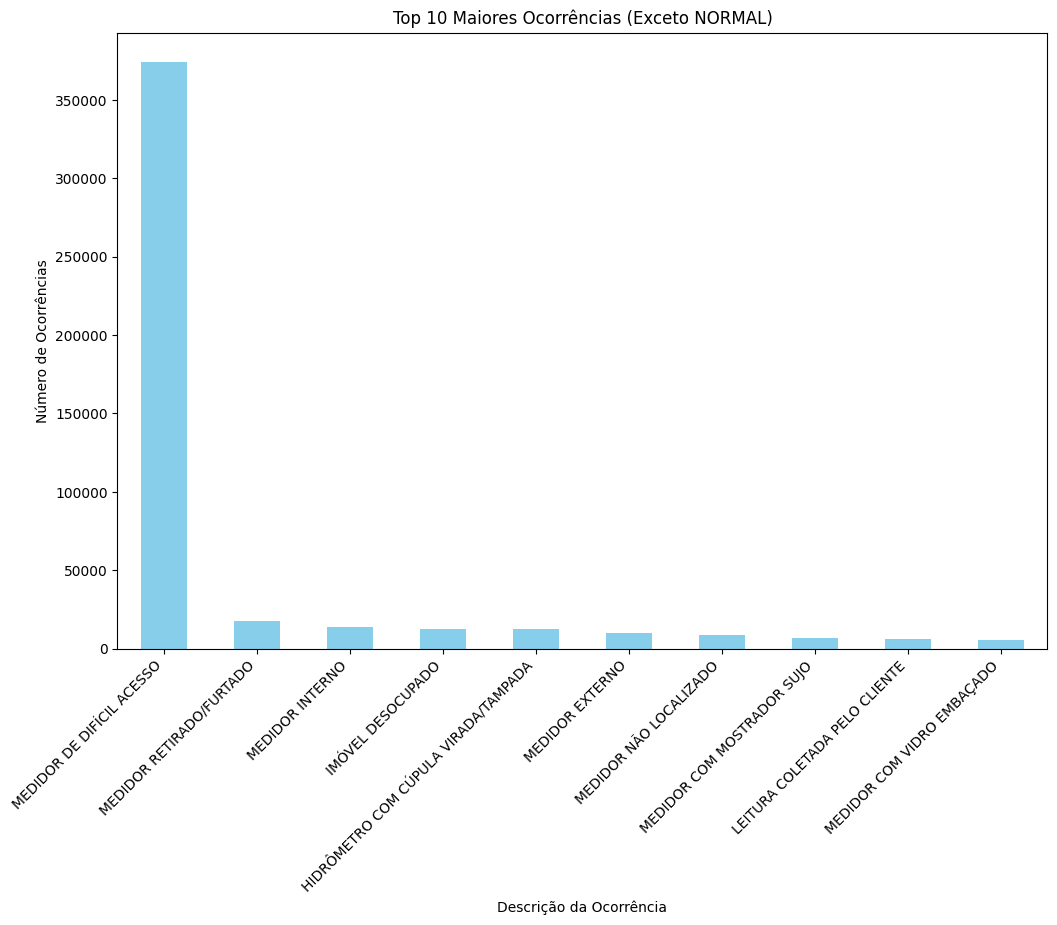

In [21]:
import matplotlib.pyplot as plt

ocorrencia_nao_normal = ALL_COLUMNS_CONSUMO_GERAL[ALL_COLUMNS_CONSUMO_GERAL['DSC_OCORRENCIA'] != 'NORMAL']

top_10_not_normal = ocorrencia_nao_normal['DSC_OCORRENCIA'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_10_not_normal.plot(kind='bar', color='skyblue')
plt.ylabel('Número de Ocorrências')
plt.xlabel('Descrição da Ocorrência')
plt.title('Top 10 Maiores Ocorrências (Exceto NORMAL)')

plt.xticks(rotation=45, ha='right')

plt.show()

In [22]:
ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI = ALL_COLUMNS_CONSUMO_GERAL[ALL_COLUMNS_CONSUMO_GERAL['DSC_OCORRENCIA'].isin([
    'NORMAL',
    'MEDIDOR RETIRADO/FURTADO',
    'LEITURA COLETADA PELO CLIENTE',
    'MEDIDOR NÃO LOCALIZADO',
    'IMÓVEL DESOCUPADO'
])]

ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
1,2024-06-01,17424465.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.520205,-54.602621
2,2024-07-01,17857770.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.517992,-54.605950
3,2024-03-01,17702922.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.453648,-54.611187
4,2024-01-01,17719490.0,20.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-9.0,0.0,NaN,N,S,-20.516981,-54.592872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210780,2019-04-01,17839769.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.432348,-54.591438
4210781,2019-04-01,17117827.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.500598,-54.642763
4210801,2019-11-01,17086687.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR NÃO LOCALIZADO,18.0,37.0,MEDIA,N,N,-20.468684,-54.625729
4210818,2019-04-01,17338320.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.456004,-54.596311


## Tratando Dataframe com mais colunas targets adicionadas

#### Seperação do Dataframe apenas para a visualização das matriculas com Categoria Residencial

In [23]:
dataframe_residencial_premissa = ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI[ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI["CATEGORIA"] == "RESIDENCIAL"]
dataframe_residencial_premissa

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
1,2024-06-01,17424465.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.520205,-54.602621
2,2024-07-01,17857770.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.517992,-54.605950
4,2024-01-01,17719490.0,20.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-9.0,0.0,NaN,N,S,-20.516981,-54.592872
5,2024-08-01,17504522.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.551475,-54.628203
7,2024-06-01,17782554.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.486213,-54.674641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210774,2019-04-01,17786757.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.460584,-54.613645
4210775,2019-04-01,17385191.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.463246,-54.613595
4210776,2019-04-01,17118066.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.502409,-54.643465
4210781,2019-04-01,17117827.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.500598,-54.642763


### Processo de One Hot Encoding para as Colunas, as quais serão as features para o nosso modelo

In [24]:
dataframe_residencial_premissa = pd.get_dummies(dataframe_residencial_premissa, columns=['TIPO_LIGACAO', 'DSC_OCORRENCIA', 'STA_TROCA', 'STA_ACEITA_LEITURA'], dtype='int')

In [25]:
dataframe_residencial_premissa

,REFERENCIA,MATRICULA,CONS_MEDIDO,CATEGORIA,SUB_CATEGORIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LATITUDE,COD_LONGITUDE,...,TIPO_LIGACAO_Hidrometrado,DSC_OCORRENCIA_IMÓVEL DESOCUPADO,DSC_OCORRENCIA_LEITURA COLETADA PELO CLIENTE,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,STA_TROCA_N,STA_TROCA_S,STA_ACEITA_LEITURA_N,STA_ACEITA_LEITURA_S
1,2024-06-01,17424465.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.520205,-54.602621,...,0,0,0,0,0,1,1,0,0,1
2,2024-07-01,17857770.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.517992,-54.605950,...,0,0,0,0,0,1,1,0,0,1
4,2024-01-01,17719490.0,20.0,RESIDENCIAL,RESIDENCIAL,-9.0,0.0,NaN,-20.516981,-54.592872,...,1,0,0,0,0,1,1,0,0,1
5,2024-08-01,17504522.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.551475,-54.628203,...,0,0,0,0,0,1,1,0,0,1
7,2024-06-01,17782554.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.486213,-54.674641,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210774,2019-04-01,17786757.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.460584,-54.613645,...,1,0,0,0,0,1,1,0,0,1
4210775,2019-04-01,17385191.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.463246,-54.613595,...,1,0,0,0,0,1,1,0,0,1
4210776,2019-04-01,17118066.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.502409,-54.643465,...,1,0,0,0,0,1,1,0,0,1
4210781,2019-04-01,17117827.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.500598,-54.642763,...,1,0,0,0,0,1,1,0,0,1


In [26]:
fraudes.columns

Index(['TIPOOS', 'ANOOS', 'IDOSP', 'ANOMES', 'MATRICULA', 'OS', 'SERVICO',
       'DESCRICAO', 'COD_GRUPO', 'SETOR', 'DATACONCLUSAO', 'STATUS', 'ATRASO',
       'DESCRSETOR', 'DESCRSETORSOLICITANTE', 'ID_CONTRATO', 'CD_CONTRATO',
       'CD_SUB_REGIAO', 'CD_REGIAO', 'FL_PRINCIPAL', 'DS_SERVICO_SOLICITADO',
       'FL_EXECUTADO', 'DT_SERVICO', 'DT_FECHAMENTO', 'PARECER_EXECUCAO'],
      dtype='object')

In [27]:
fraudes

,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,SETOR,...,ID_CONTRATO,CD_CONTRATO,CD_SUB_REGIAO,CD_REGIAO,FL_PRINCIPAL,DS_SERVICO_SOLICITADO,FL_EXECUTADO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO
0,Desdobro,2023,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,0.0,80.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1,2023-11-06 0:00:00,2023-11-06 11:07:02,NaN
1,Desdobro,2024,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,0.0,70.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE,1,2024-02-13 0:00:00,2024-02-13 15:59:01,421.0
2,Desdobro,2024,240100021314,01/24,17234771,21314,110013,IRREGULARIDADE IDENTIFICADA,0.0,96.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE IDENTIFICADA - LEITURA,1,2024-01-08 0:00:00,2024-01-08 15:45:46,413.0
3,Desdobro,2023,230101217142,12/23,17837656,1217142,110013,IRREGULARIDADE IDENTIFICADA,0.0,1.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE SUSPEITA - LEITURISTA,1,2024-01-03 0:00:00,2024-01-03 15:40:12,NaN
4,Desdobro,2024,240100077627,01/24,17722316,77627,110013,IRREGULARIDADE IDENTIFICADA,0.0,84.0,...,41,41,0.0,0.0,0,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1,2024-01-24 0:00:00,2024-01-24 08:53:18,421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225992,OsOnline,2020,200100034631,01/20,17865556,100034631,2039,IRREGULARIDADE IDENTIFICADA,4.0,92.0,...,53,18,1.0,1.0,0,VERIFICACAO DE IRREGULARIDADE,1,2020-01-14 14:00:07,2020-01-14 14:42:56,NaN
225993,OsOnline,2022,220100065876,01/22,17511826,100065876,110013,IRREGULARIDADE IDENTIFICADA,4.0,76.0,...,53,18,1.0,1.0,0,VISTORIA DE IRREGULARIDADE - DENUNCIA,1,2022-01-21 10:38:13,2022-01-21 10:38:23,NaN
225994,OsOnline,2022,220100450752,05/22,17920302,100450752,110013,IRREGULARIDADE IDENTIFICADA,4.0,3.0,...,53,18,2.0,1.0,0,VISTORIA DE IRREGULARIDADE IDENTIFICADA - LEITURA,1,2022-05-10 16:51:43,2022-05-10 16:52:03,NaN
225995,OsOnline,2022,220101353952,12/22,17801545,101353952,110013,IRREGULARIDADE IDENTIFICADA,4.0,2.0,...,53,18,2.0,1.0,0,VISTORIA POS CORTE,1,2022-12-30 11:52:39,2022-12-30 12:22:23,NaN


In [28]:
dataframe_fraudes_premissa = fraudes[['MATRICULA', 'DESCRICAO']].drop_duplicates()
dataframe_fraudes_premissa = pd.get_dummies(dataframe_fraudes_premissa, columns=['DESCRICAO'], dtype='int')

In [29]:
dataframe_fraudes_premissa['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].unique()

array([1])

In [30]:
len(dataframe_fraudes_premissa)

124168

In [31]:
dataframe_residencial_premissa = pd.merge(dataframe_residencial_premissa, dataframe_fraudes_premissa, on='MATRICULA', how='left')

In [32]:
# dataframe_residencial_premissa.drop_duplicates(subset="MATRICULA", keep='first')
dataframe_residencial_premissa.dropna(subset="REFERENCIA")

,REFERENCIA,MATRICULA,CONS_MEDIDO,CATEGORIA,SUB_CATEGORIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LATITUDE,COD_LONGITUDE,...,DSC_OCORRENCIA_IMÓVEL DESOCUPADO,DSC_OCORRENCIA_LEITURA COLETADA PELO CLIENTE,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,STA_TROCA_N,STA_TROCA_S,STA_ACEITA_LEITURA_N,STA_ACEITA_LEITURA_S,DESCRICAO_IRREGULARIDADE IDENTIFICADA
0,2024-06-01,17424465.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.520205,-54.602621,...,0,0,0,0,1,1,0,0,1,NaN
1,2024-07-01,17857770.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.517992,-54.605950,...,0,0,0,0,1,1,0,0,1,NaN
2,2024-01-01,17719490.0,20.0,RESIDENCIAL,RESIDENCIAL,-9.0,0.0,NaN,-20.516981,-54.592872,...,0,0,0,0,1,1,0,0,1,1.0
3,2024-08-01,17504522.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.551475,-54.628203,...,0,0,0,0,1,1,0,0,1,NaN
4,2024-06-01,17782554.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.486213,-54.674641,...,0,0,0,0,1,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106216,2019-04-01,17786757.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.460584,-54.613645,...,0,0,0,0,1,1,0,0,1,NaN
18106217,2019-04-01,17385191.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.463246,-54.613595,...,0,0,0,0,1,1,0,0,1,NaN
18106218,2019-04-01,17118066.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.502409,-54.643465,...,0,0,0,0,1,1,0,0,1,NaN
18106219,2019-04-01,17117827.0,0.0,RESIDENCIAL,RESIDENCIAL,0.0,0.0,NaN,-20.500598,-54.642763,...,0,0,0,0,1,1,0,0,1,NaN


### Normalizando com o Robust Scaler

O RobustScaler é uma técnica de normalização usada para transformar dados. Ele é útil especialmente quando os dados contêm outliers, ou seja, valores atípicos que podem distorcer (neste caso o Consumo e o Volume) os resultados de outras técnicas de escalonamento, como StandardScaler ou MinMaxScaler.

O RobustScaler transforma os dados subtraindo a mediana e dividindo pela amplitude interquartil (IQR, Interquartile Range). A mediana é o valor do ponto médio quando os dados são ordenados, e o IQR é a diferença entre o terceiro quartil (75º percentil) e o primeiro quartil (25º percentil).

Esse método é menos sensível a outliers porque, ao contrário da média e do desvio padrão (usados pelo StandardScaler), a mediana e o IQR não são afetados por valores extremos.

In [33]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
## pivoted_df[['CONS_MEDIDO', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM']] = scaler.fit_transform(pivoted_df[['CONS_MEDIDO', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM']])
dataframe_residencial_premissa[['CONS_MEDIDO']] = scaler.fit_transform(dataframe_residencial_premissa[['CONS_MEDIDO']])
dataframe_residencial_premissa[['VOLUME_ESTIMADO']] = scaler.fit_transform(dataframe_residencial_premissa[['VOLUME_ESTIMADO']])

In [34]:
pivoted_df = pd.pivot_table(
    dataframe_residencial_premissa,
    index='MATRICULA',
    columns='REFERENCIA',
    values=['CONS_MEDIDO', 'VOLUME_ESTIMADO'],
    aggfunc='sum'
)

pivoted_df.columns = ['_'.join(col).strip() for col in pivoted_df.columns.values]
pivoted_df = pivoted_df.reset_index()

# Display the result
pivoted_df.head()

,MATRICULA,CONS_MEDIDO_2019-01-01,CONS_MEDIDO_2019-02-01,CONS_MEDIDO_2019-03-01,CONS_MEDIDO_2019-04-01,CONS_MEDIDO_2019-05-01,CONS_MEDIDO_2019-06-01,CONS_MEDIDO_2019-07-01,CONS_MEDIDO_2019-08-01,CONS_MEDIDO_2019-09-01,...,VOLUME_ESTIMADO_2023-11-01,VOLUME_ESTIMADO_2023-12-01,VOLUME_ESTIMADO_2024-01-01,VOLUME_ESTIMADO_2024-02-01,VOLUME_ESTIMADO_2024-03-01,VOLUME_ESTIMADO_2024-04-01,VOLUME_ESTIMADO_2024-05-01,VOLUME_ESTIMADO_2024-06-01,VOLUME_ESTIMADO_2024-07-01,VOLUME_ESTIMADO_2024-08-01
0,17000001.0,-0.727273,-0.545455,-0.181818,0.181818,-0.181818,0.363636,0.000000,0.000000,-0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17075336.0,0.363636,0.363636,0.000000,-0.545455,-0.727273,-0.727273,-1.454545,-1.454545,-1.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17075337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17075340.0,2.000000,2.363636,3.818182,3.090909,2.909091,3.818182,4.727273,4.545455,4.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17075341.0,10.727273,9.272727,9.636364,10.000000,10.181818,9.272727,8.363636,8.545455,9.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
len(pivoted_df)

367227

### Atribuição de cada uma das variáveis categóricas ao dataframe com o consumo e volume históricos

- É importante citar aqui que atribuímos a premissa que a primeira definição de tipo de ligação, descrição e os outros utilizados, serão os que tomaremos como base para inferência dentro do modelo

In [36]:
tipo_ligacao = dataframe_residencial_premissa[['MATRICULA','TIPO_LIGACAO_Consumo Fixo', 'TIPO_LIGACAO_Hidrometrado']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(tipo_ligacao, on='MATRICULA', how='left').fillna(0)

In [37]:
descricao_ocorrencia = dataframe_residencial_premissa[['MATRICULA','DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO', 'DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO', 'DSC_OCORRENCIA_NORMAL']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(descricao_ocorrencia, on='MATRICULA', how='left').fillna(0)

In [38]:
# STA_TROCA  = dataframe_residencial_premissa[['MATRICULA','STA_TROCA_S', 'STA_TROCA_N']].drop_duplicates(subset='MATRICULA', keep='first')
# pivoted_df = pivoted_df.merge(STA_TROCA, on='MATRICULA', how='left').fillna(0)

In [39]:
# STA_ACEITA_LEITURA = dataframe_residencial_premissa[['MATRICULA','STA_ACEITA_LEITURA_S', 'STA_ACEITA_LEITURA_N']].drop_duplicates(subset='MATRICULA', keep='first')
# pivoted_df = pivoted_df.merge(STA_ACEITA_LEITURA, on='MATRICULA', how='left').fillna(0)

In [40]:
fraude_ou_não = dataframe_residencial_premissa[['MATRICULA','DESCRICAO_IRREGULARIDADE IDENTIFICADA']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(fraude_ou_não, on='MATRICULA', how='left').fillna(0)

In [41]:
pivoted_df = pivoted_df.fillna(0)

In [42]:
pivoted_df

,MATRICULA,CONS_MEDIDO_2019-01-01,CONS_MEDIDO_2019-02-01,CONS_MEDIDO_2019-03-01,CONS_MEDIDO_2019-04-01,CONS_MEDIDO_2019-05-01,CONS_MEDIDO_2019-06-01,CONS_MEDIDO_2019-07-01,CONS_MEDIDO_2019-08-01,CONS_MEDIDO_2019-09-01,...,VOLUME_ESTIMADO_2024-05-01,VOLUME_ESTIMADO_2024-06-01,VOLUME_ESTIMADO_2024-07-01,VOLUME_ESTIMADO_2024-08-01,TIPO_LIGACAO_Consumo Fixo,TIPO_LIGACAO_Hidrometrado,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,DESCRICAO_IRREGULARIDADE IDENTIFICADA
0,17000001.0,-0.727273,-0.545455,-0.181818,0.181818,-0.181818,0.363636,0.000000,0.000000,-0.181818,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
1,17075336.0,0.363636,0.363636,0.000000,-0.545455,-0.727273,-0.727273,-1.454545,-1.454545,-1.454545,...,0.0,0.0,0.0,0.0,0,1,0,0,1,1.0
2,17075337.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
3,17075340.0,2.000000,2.363636,3.818182,3.090909,2.909091,3.818182,4.727273,4.545455,4.363636,...,0.0,0.0,0.0,0.0,0,1,0,0,1,1.0
4,17075341.0,10.727273,9.272727,9.636364,10.000000,10.181818,9.272727,8.363636,8.545455,9.090909,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367222,17997641.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,1.0
367223,17997645.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
367224,17997650.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
367225,17997671.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0


In [43]:
colunas_data = ['CONS_MEDIDO_2019-01-01', 'CONS_MEDIDO_2019-02-01',
       'CONS_MEDIDO_2019-03-01', 'CONS_MEDIDO_2019-04-01',
       'CONS_MEDIDO_2019-05-01', 'CONS_MEDIDO_2019-06-01',
       'CONS_MEDIDO_2019-07-01', 'CONS_MEDIDO_2019-08-01',
       'CONS_MEDIDO_2019-09-01', 'CONS_MEDIDO_2019-10-01',
       'CONS_MEDIDO_2019-11-01', 'CONS_MEDIDO_2019-12-01',
       'CONS_MEDIDO_2022-01-01', 'CONS_MEDIDO_2022-02-01',
       'CONS_MEDIDO_2022-03-01', 'CONS_MEDIDO_2022-04-01',
       'CONS_MEDIDO_2022-05-01', 'CONS_MEDIDO_2022-06-01',
       'CONS_MEDIDO_2022-07-01', 'CONS_MEDIDO_2022-08-01',
       'CONS_MEDIDO_2022-09-01', 'CONS_MEDIDO_2022-10-01',
       'CONS_MEDIDO_2022-11-01', 'CONS_MEDIDO_2022-12-01',
       'CONS_MEDIDO_2023-01-01', 'CONS_MEDIDO_2023-02-01',
       'CONS_MEDIDO_2023-03-01', 'CONS_MEDIDO_2023-04-01',
       'CONS_MEDIDO_2023-05-01', 'CONS_MEDIDO_2023-06-01',
       'CONS_MEDIDO_2023-07-01', 'CONS_MEDIDO_2023-08-01',
       'CONS_MEDIDO_2023-09-01', 'CONS_MEDIDO_2023-10-01',
       'CONS_MEDIDO_2023-11-01', 'CONS_MEDIDO_2023-12-01',
       'CONS_MEDIDO_2024-01-01', 'CONS_MEDIDO_2024-02-01',
       'CONS_MEDIDO_2024-03-01', 'CONS_MEDIDO_2024-04-01',
       'CONS_MEDIDO_2024-05-01', 'CONS_MEDIDO_2024-06-01',
       'CONS_MEDIDO_2024-07-01', 'CONS_MEDIDO_2024-08-01']

In [44]:
# from imblearn.under_sampling import RandomUnderSampler

# def balanciar(df):
#   rus = RandomUnderSampler(random_state=42)
#   X = pivoted_df.drop('DESCRICAO_IRREGULARIDADE IDENTIFICADA', axis=1)
#   y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA']
#   X_res, y_res = rus.fit_resample(X, y)
#   return pd.concat([X_res, y_res], axis=1)

In [45]:
# pivoted_df = balanciar(pivoted_df)

In [46]:
np.unique(pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values, return_counts=True)

(array([0., 1.]), array([250019, 117208]))

## Rodando o modelo

### Divisão de Treino e Teste

In [47]:
pivoted_df.shape

(367227, 95)

In [48]:
# def balanciar(df):
#   rus = RandomUnderSampler(random_state=42)
#   X = pivoted_df.drop('DESCRICAO_IRREGULARIDADE IDENTIFICADA', axis=1)
#   y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA']
#   X_res, y_res = rus.fit_resample(X, y)
#   return pd.concat([X_res, y_res], axis=1)

#### Balanceando os dados com Smote (Synthetic Minority Over-sampling Technique)

O smote é uma técnica de "oversampling" usada para balancear datasets com o objetivo de aumentar a quantidade de amostras da classe minoritária gerando novos exemplos sintéticos, em vez de simplesmente replicar os dados existentes. Isso ajuda a melhorar a performance de modelos de machine learning ao treinar com um dataset mais balanceado.

Quando você treina um modelo de machine learning com um dataset desbalanceado (onde uma classe tem muito mais exemplos do que a outra), o modelo tende a favorecer a classe majoritária.

Como resultado, o modelo pode ter um bom desempenho em termos de acurácia geral, mas um desempenho ruim ao identificar a classe minoritária (por exemplo, falhas, fraudes, etc.).

O Smote ajuda a mitigar esse problema ao balancear o dataset, aumentando o número de exemplos da classe minoritária.

In [49]:
def balanciar(df):
  smote = SMOTE(random_state=42)
  X = pivoted_df.drop('DESCRICAO_IRREGULARIDADE IDENTIFICADA', axis=1)
  y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA']
  X_res, y_res = smote.fit_resample(X, y)
  return pd.concat([X_res, y_res], axis=1)

In [50]:
np.unique(pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values, return_counts=True)

(array([0., 1.]), array([250019, 117208]))

In [51]:
pivoted_df = balanciar(pivoted_df.fillna(0))

In [52]:
pivoted_df.columns

Index(['MATRICULA', 'CONS_MEDIDO_2019-01-01', 'CONS_MEDIDO_2019-02-01',
       'CONS_MEDIDO_2019-03-01', 'CONS_MEDIDO_2019-04-01',
       'CONS_MEDIDO_2019-05-01', 'CONS_MEDIDO_2019-06-01',
       'CONS_MEDIDO_2019-07-01', 'CONS_MEDIDO_2019-08-01',
       'CONS_MEDIDO_2019-09-01', 'CONS_MEDIDO_2019-10-01',
       'CONS_MEDIDO_2019-11-01', 'CONS_MEDIDO_2019-12-01',
       'CONS_MEDIDO_2022-01-01', 'CONS_MEDIDO_2022-02-01',
       'CONS_MEDIDO_2022-03-01', 'CONS_MEDIDO_2022-04-01',
       'CONS_MEDIDO_2022-05-01', 'CONS_MEDIDO_2022-06-01',
       'CONS_MEDIDO_2022-07-01', 'CONS_MEDIDO_2022-08-01',
       'CONS_MEDIDO_2022-09-01', 'CONS_MEDIDO_2022-10-01',
       'CONS_MEDIDO_2022-11-01', 'CONS_MEDIDO_2022-12-01',
       'CONS_MEDIDO_2023-01-01', 'CONS_MEDIDO_2023-02-01',
       'CONS_MEDIDO_2023-03-01', 'CONS_MEDIDO_2023-04-01',
       'CONS_MEDIDO_2023-05-01', 'CONS_MEDIDO_2023-06-01',
       'CONS_MEDIDO_2023-07-01', 'CONS_MEDIDO_2023-08-01',
       'CONS_MEDIDO_2023-09-01', 'CONS_MEDI

In [53]:
y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values
X = pivoted_df.drop(['MATRICULA','DESCRICAO_IRREGULARIDADE IDENTIFICADA'], axis=1).values

In [54]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [73]:
# fig = px.scatter(pivoted_df, x=x_train[:, 0], y=x_train[:, 1], color=y_train, title='Distribuição dos Dados')
# fig.show()

In [56]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,769 (34.25 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss='binary_crossentropy', metrics=['accuracy', 'precision'])

In [60]:
x_train.shape

(350026, 93)

In [61]:
y_train.shape

(350026,)

In [62]:
x_val.shape

(150012, 93)

In [63]:
y_val.shape

(150012,)

In [66]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

result = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/25
10939/10939 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.5491 - loss: 0.7415 - precision: 0.5713 - val_accuracy: 0.6099 - val_loss: 0.6756 - val_precision: 0.5973
Epoch 2/25
10939/10939 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5924 - loss: 0.6818 - precision: 0.6121 - val_accuracy: 0.6056 - val_loss: 0.6759 - val_precision: 0.6693
Epoch 3/25
10939/10939 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5947 - loss: 0.6799 - precision: 0.6182 - val_accuracy: 0.6130 - val_loss: 0.6696 - val_precision: 0.6359
Epoch 4/25
10939/10939 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5953 - loss: 0.6788 - precision: 0.6162 - val_accuracy: 0.6090 - val_loss: 0.6718 - val_precision: 0.6315
Epoch 5/25
10939/10939 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5933 - loss: 0.6795 - precision: 0.6122 - val_accuracy: 0.6164 - val_loss: 0.6697 - val_precision: 0.6292
Epoch 6/25
10939/10939 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5947 - loss: 0.6788 - precision: 0.6140 - va

In [67]:
history = result.history
fig = px.line(x=list(range(1, 26)), y=history['loss'], labels={'x': 'Épocas', 'y': 'Perda'}, title='Função de Custo durante o Treinamento')
fig.update_traces(mode='lines+markers')
fig.show()

In [68]:
import plotly.graph_objects as go

layers = {
    'Input': (1, 1),
    'Dense 64': (2, 1),
    'Dense 32': (3, 1),
    'Dense 16': (4, 1),
    'Output': (5, 1)
}

fig = go.Figure()

for layer, (x, y) in layers.items():
    fig.add_trace(go.Scatter(
        x=[x], y=[y],
        mode='markers+text',
        text=[layer],
        textposition='top center',
        marker=dict(size=20, color='blue')
    ))

for i in range(1, len(layers)):
    fig.add_trace(go.Scatter(
        x=[i, i+1],
        y=[1, 1],
        mode='lines',
        line=dict(width=2)
    ))

fig.update_layout(
    title='Arquitetura da Rede Neural',
    xaxis_title='Camadas',
    yaxis_title='Posição',
    showlegend=False,
    xaxis=dict(tickvals=list(layers.values()), ticktext=list(layers.keys())),
    yaxis=dict(range=[0, 2])
)

fig.show()

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


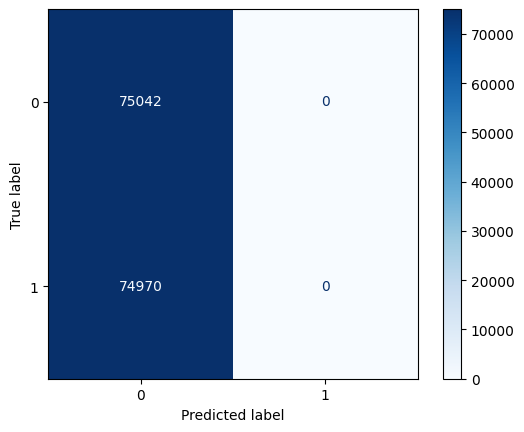

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_val, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

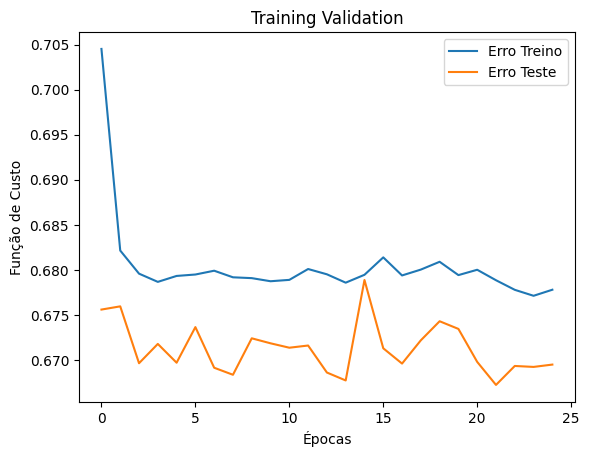

In [70]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(['Erro Treino', 'Erro Teste'])
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.title('Training Validation')
plt.show()

In [71]:
fig = go.Figure()

fig.add_trace(go.Line(x=list(range(1, 26)), y=history['accuracy'], mode='lines+markers', name='Precisão de Treinamento'))

fig.add_trace(go.Line(x=list(range(1, 26)), y=history['val_loss'], mode='lines+markers', name='Perda de Validação'))

fig.update_layout(title='Precisão e Perda durante o Treinamento', xaxis_title='Épocas', yaxis_title='Valor', legend_title='Métrica')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




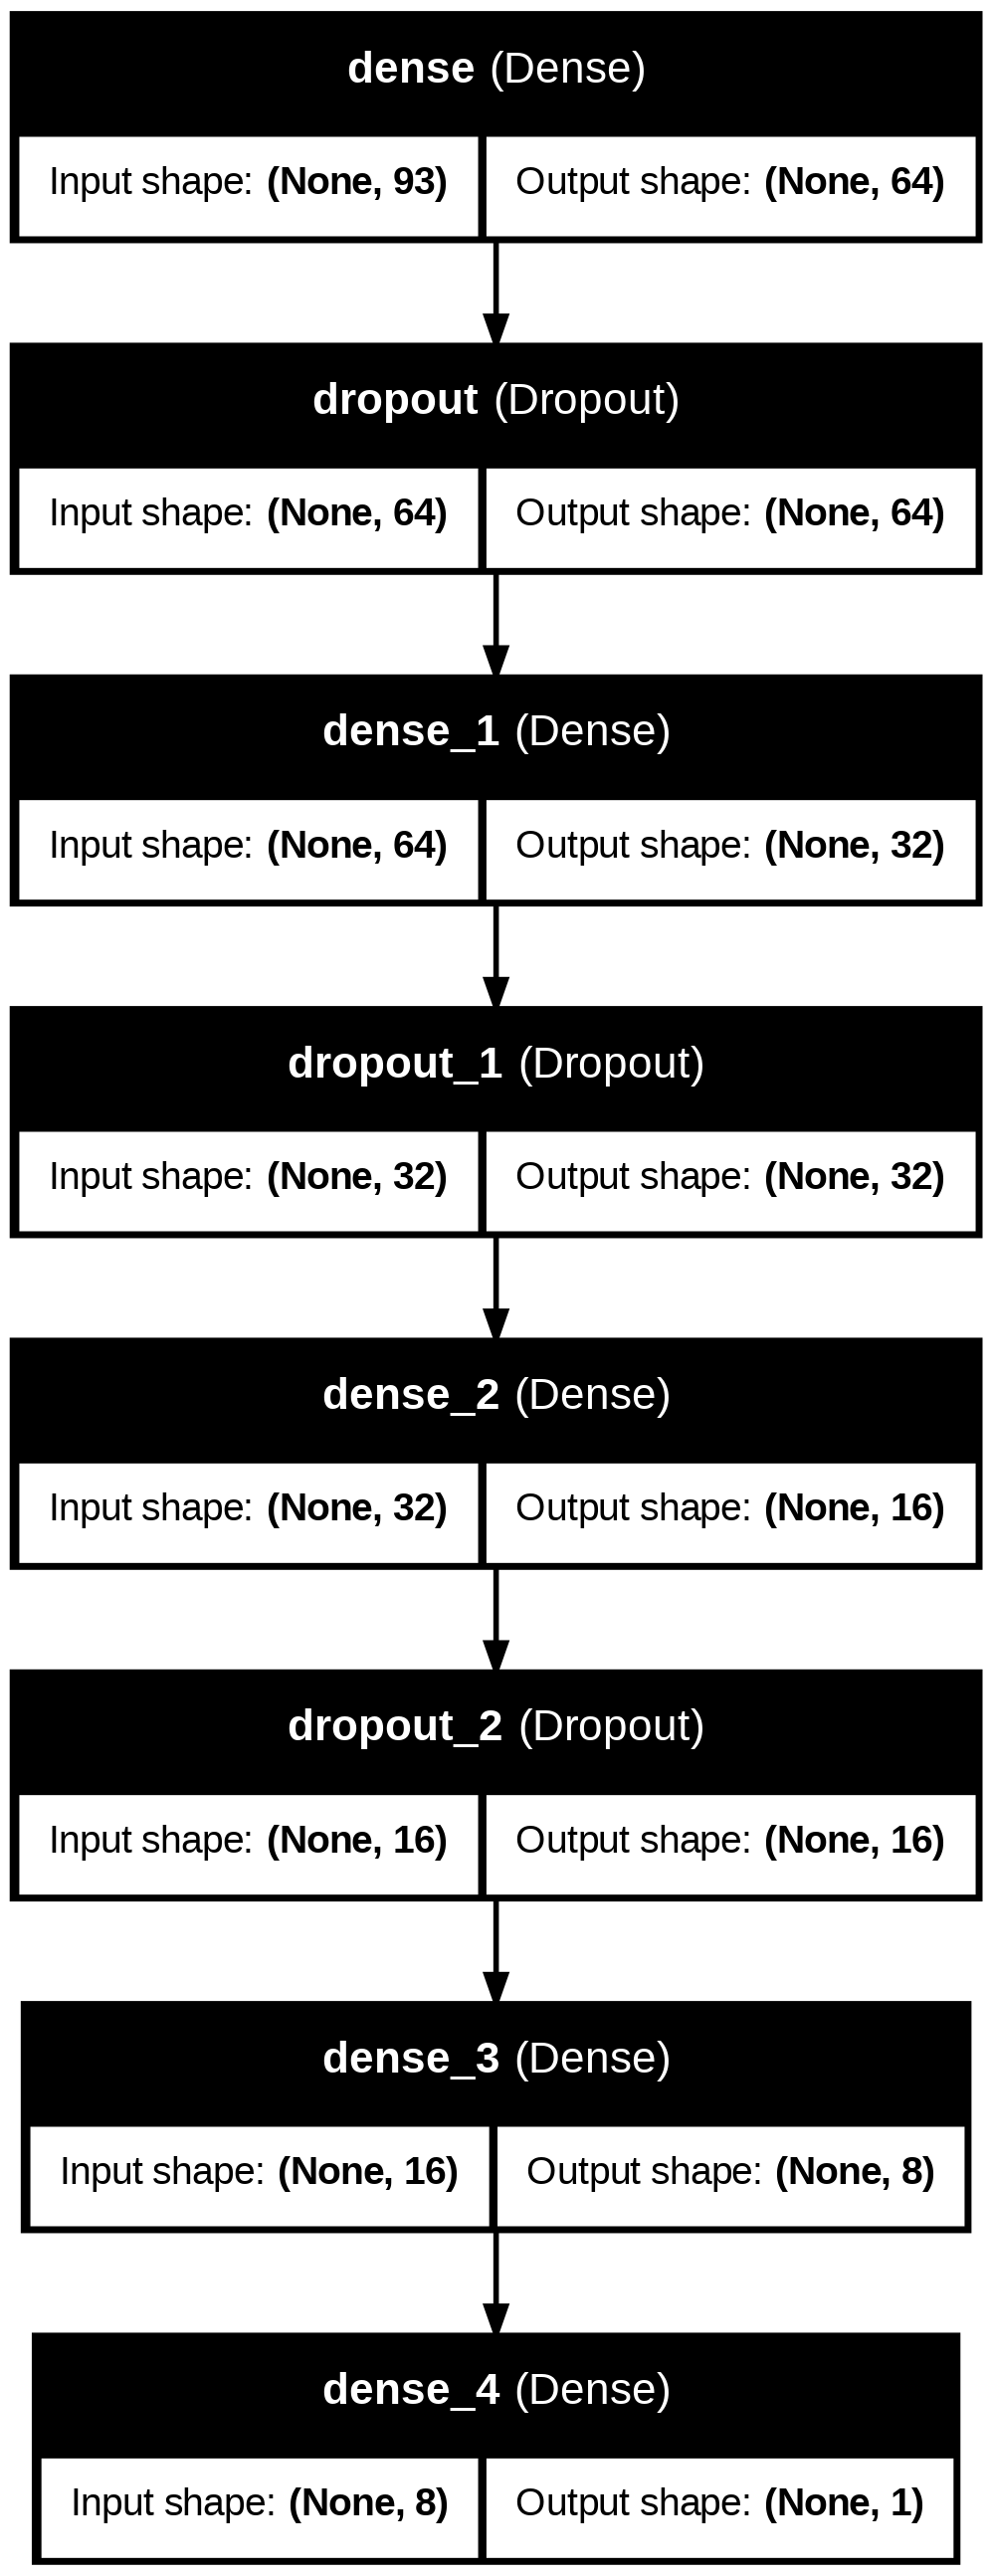

In [72]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)